In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression

In [21]:
df = pd.read_csv('creditcard.csv')

In [22]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38640,39476.0,-3.680836,3.372195,-1.506284,2.808464,-1.774911,-0.670063,-1.403113,2.368055,-1.330031,...,0.085529,0.175152,0.432905,0.508793,-0.056049,0.132034,-0.268776,-0.112833,9.38,0
77602,57125.0,-1.076259,0.766172,-0.563092,-0.760820,3.606286,3.023131,0.746075,0.040723,-0.212736,...,-0.000451,0.094631,-0.506360,1.024629,0.074896,-0.503190,-0.971029,-0.236783,1.00,0
132668,80073.0,1.169465,-0.222297,-1.378480,-0.597150,2.105641,3.133750,-0.212065,0.724329,-0.224234,...,-0.506945,-1.864459,0.158749,0.966121,0.200889,-0.016651,-0.064814,0.024188,85.90,0
63828,50884.0,-1.224637,-0.477251,1.093587,-2.282310,-0.781247,-1.312212,-0.468401,0.303496,-3.004287,...,-0.399621,-1.233891,0.086451,0.441872,0.282584,-0.644413,-0.304348,-0.112886,18.85,0
233892,147744.0,2.019123,0.467365,-2.503328,0.585179,0.711222,-1.232674,0.201349,-0.175408,0.381975,...,0.124901,0.499846,-0.084948,-0.630314,0.231511,-0.092106,0.014186,-0.007823,1.00,0
220025,141988.0,-0.439490,0.389228,0.209763,-0.483860,0.603277,-1.230838,0.829985,-0.161491,0.187871,...,-0.278347,-0.584500,0.468299,-0.052742,-0.451350,0.149949,0.165218,0.048046,1.79,0
253368,156220.0,-0.257462,1.075974,0.573823,-0.429634,-0.011356,-1.658532,1.031852,-0.278964,0.020892,...,-0.229321,-0.393742,0.176979,0.933527,-0.543630,0.086413,0.362791,0.164880,2.97,0
193142,130010.0,1.971298,0.416400,-0.991732,3.665924,0.824267,0.704844,0.041579,0.051340,-0.542975,...,0.017411,0.180846,0.028540,0.017508,0.239512,0.108500,-0.034836,-0.051715,7.57,0
84030,60133.0,1.307200,0.284121,-0.227873,0.261800,0.357315,0.021328,-0.028857,0.015683,-0.170530,...,-0.320926,-0.944598,-0.051064,-1.038976,0.371876,0.158956,-0.027174,0.007633,1.98,0
185680,126771.0,-1.000382,0.174555,-0.953920,-0.205405,0.979324,-1.084933,1.100107,0.108047,-1.159431,...,0.424270,0.725567,-0.024916,-0.336885,-0.085107,0.264606,-0.021866,-0.013638,123.42,0


In [23]:
df.shape

(284807, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

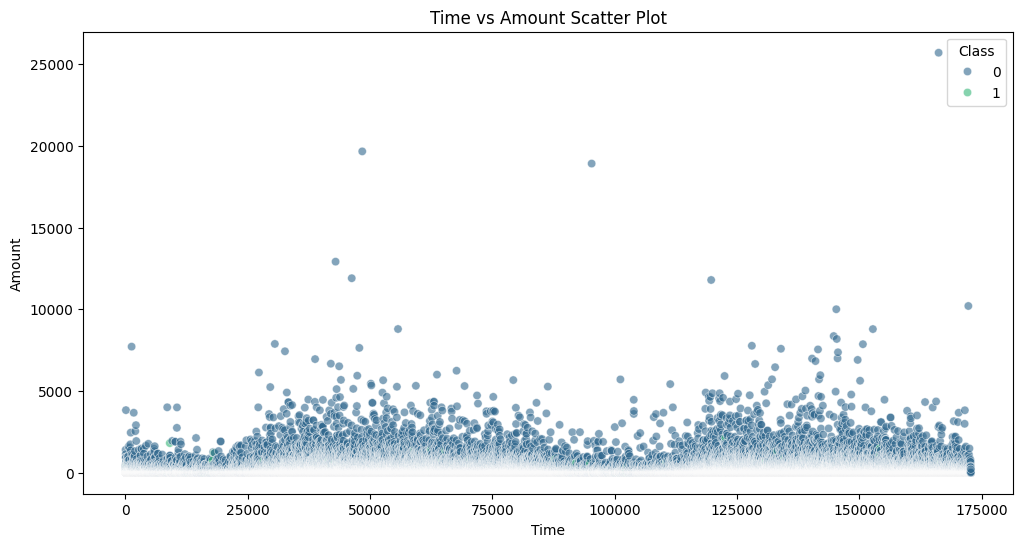

In [25]:
#Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

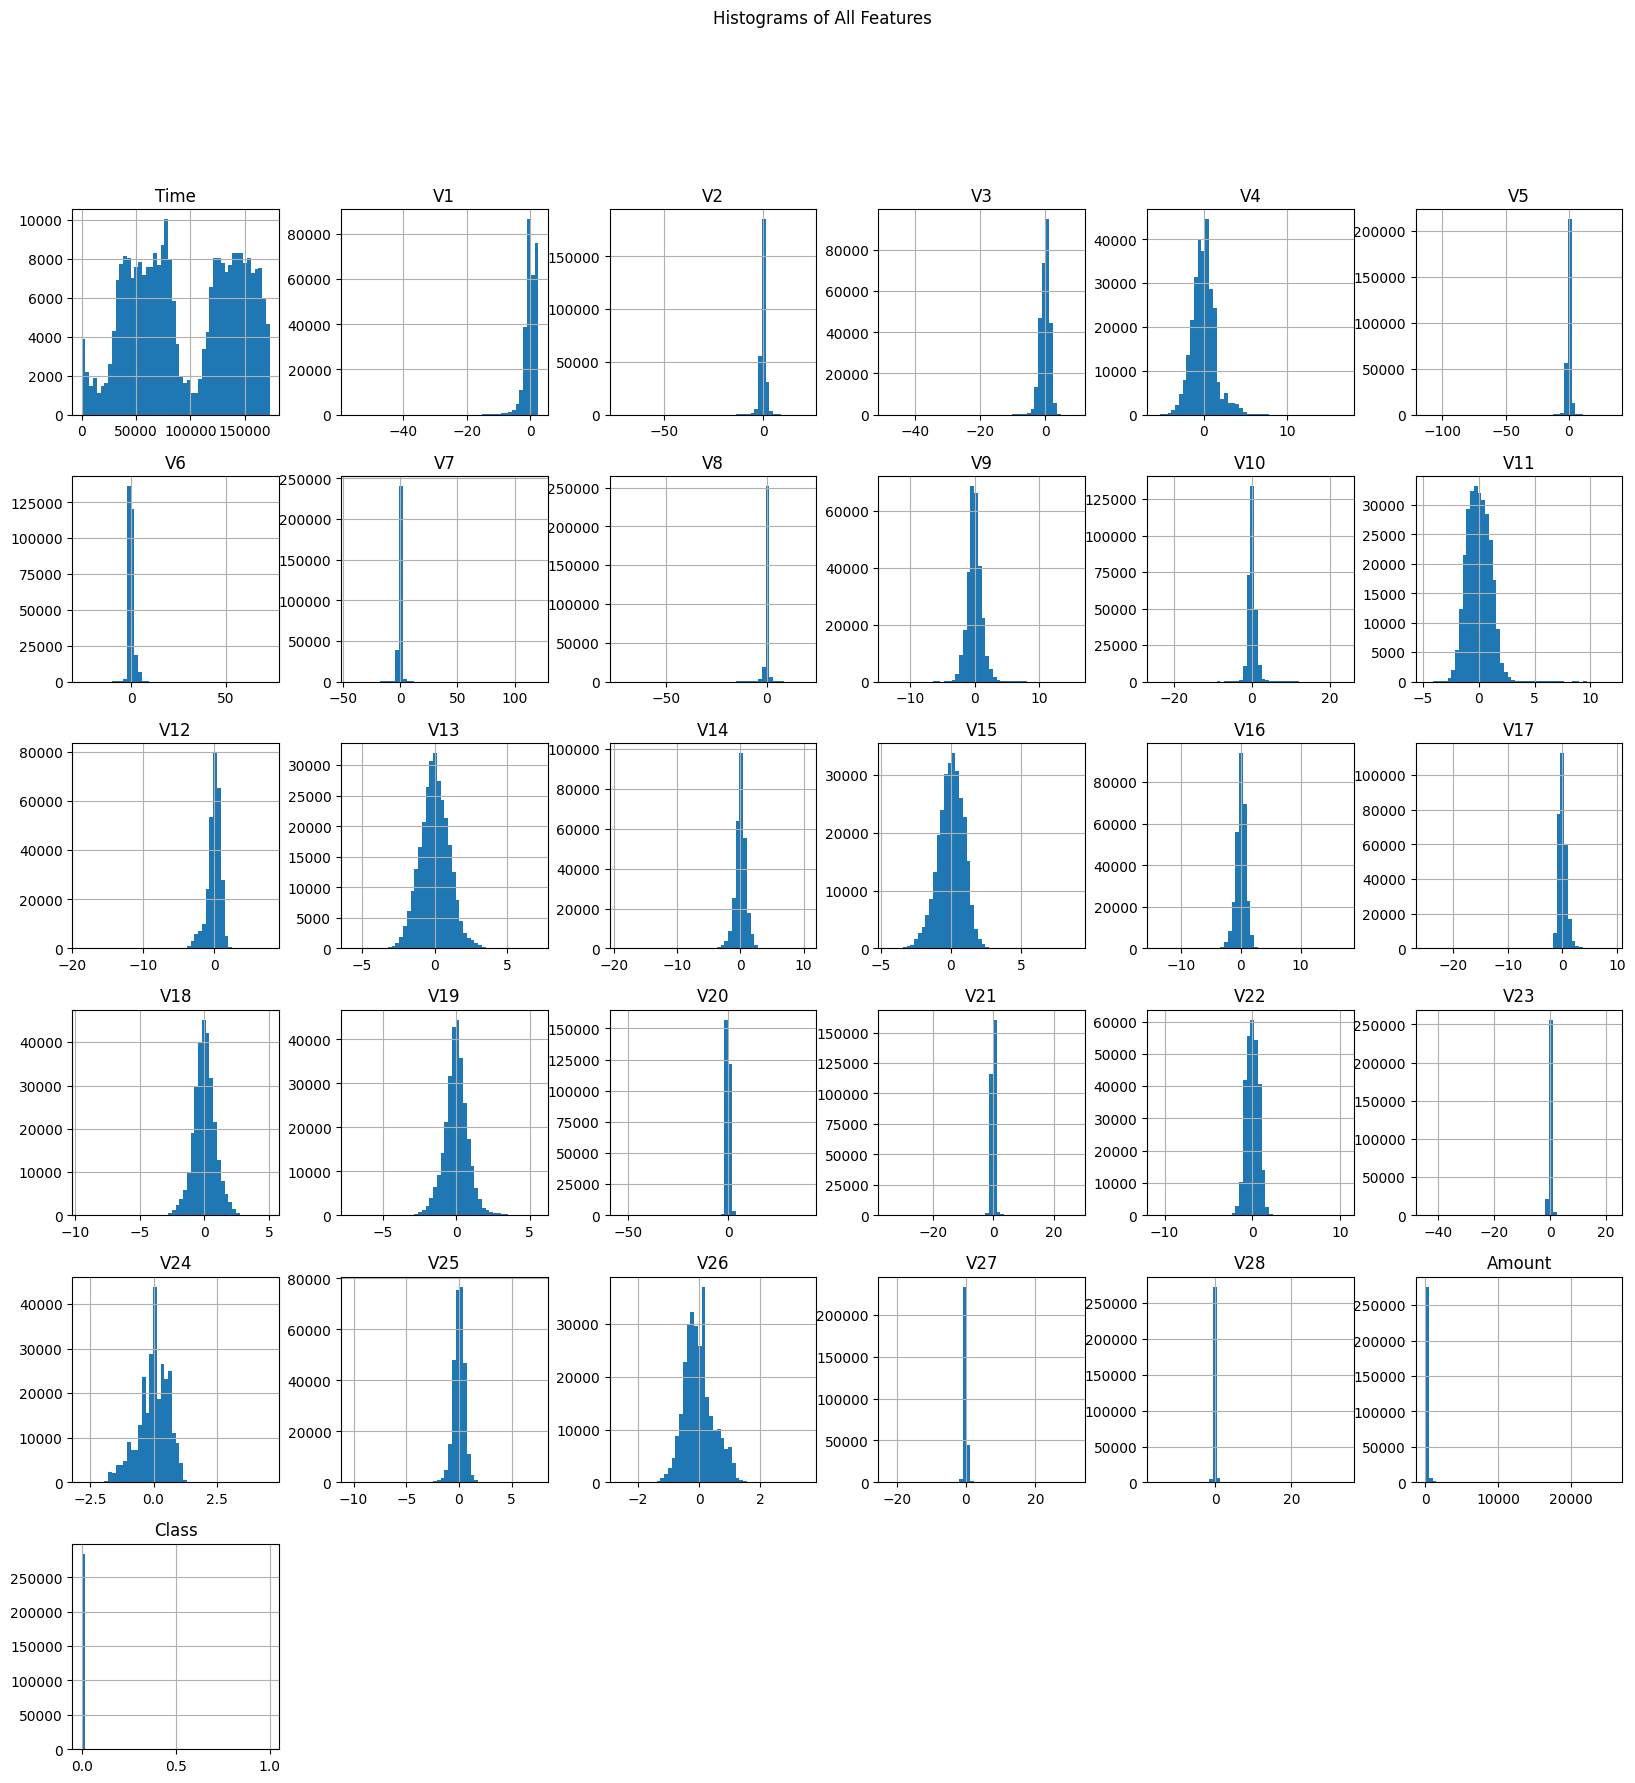

In [26]:
#Histograms of the features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

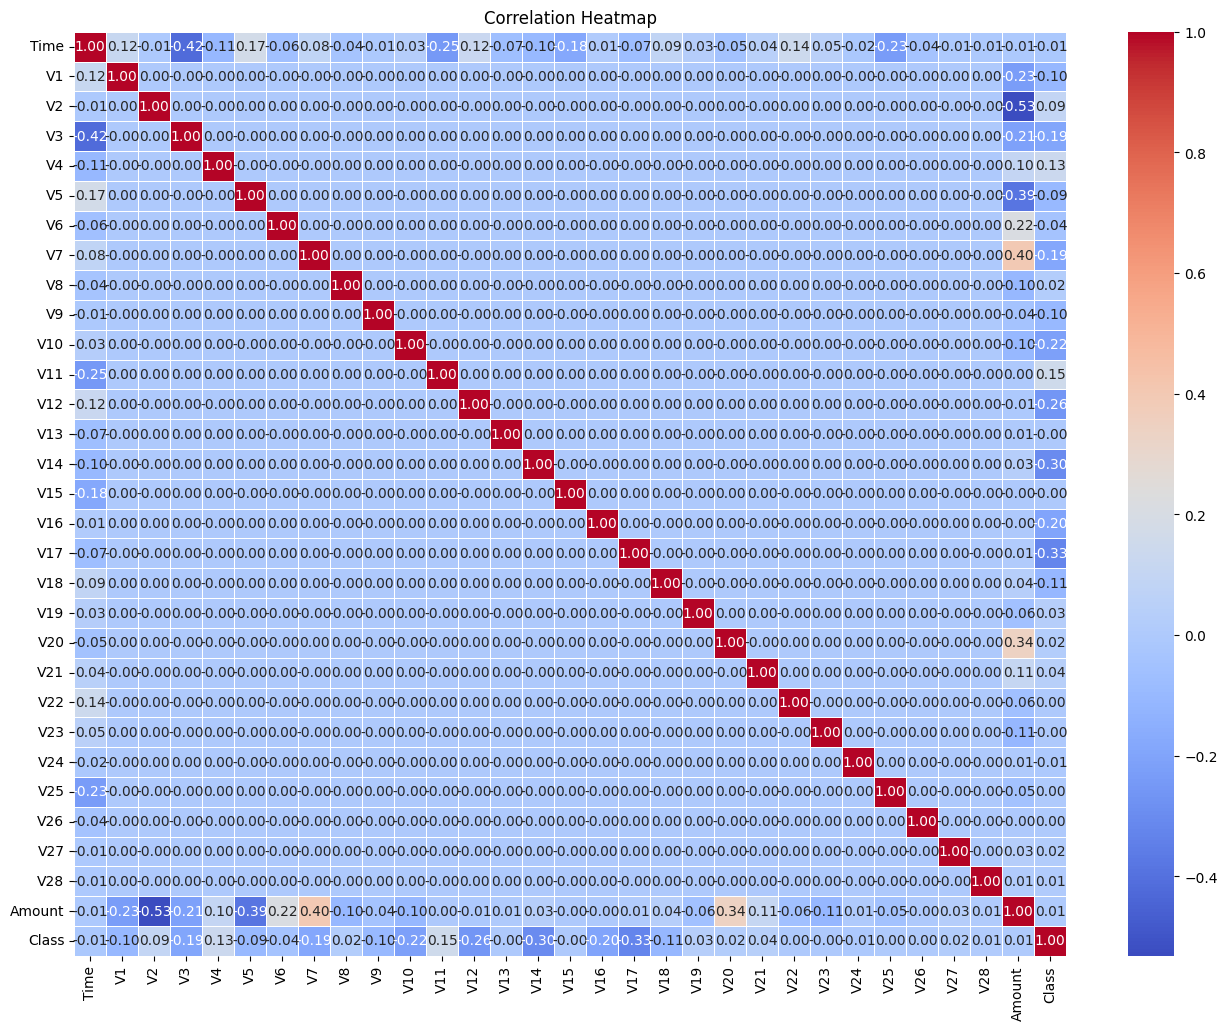

In [27]:
#Correlation heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, Y_train)

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [31]:
Y_pred = log_reg_model.predict(X_test)
Y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]

In [32]:
# Predicting for Training and Testing data
Y_train_pred = log_reg_model.predict(X_train)
Y_test_pred = log_reg_model.predict(X_test)
# Calculating Training and Testing accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9992099892470758
Testing Accuracy: 0.9990168884519505


In [33]:
print("\nClassification Report:")
print(classification_report(Y_test,Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.54      0.65        98

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
accuracy = accuracy_score(Y_test,Y_pred)
print('Accuracy score: ',accuracy)

Accuracy score:  0.9990168884519505



ROC-AUC Score: 0.9674256801764036


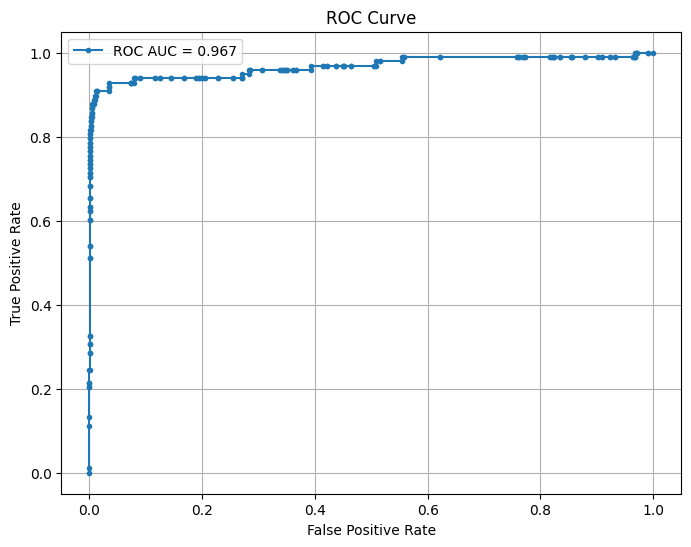

In [39]:
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")


# ROC Curve 
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(Y_test, Y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Area Under the Precision-Recall Curve: 0.7177317238233514


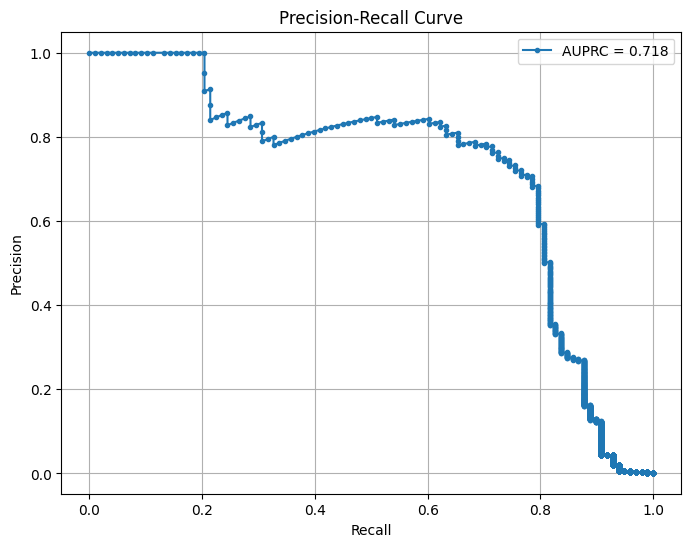

In [40]:
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_prob)
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve: {auprc}")

# Precision-Recall Curve 
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix:
[[56853    11]
 [   45    53]]


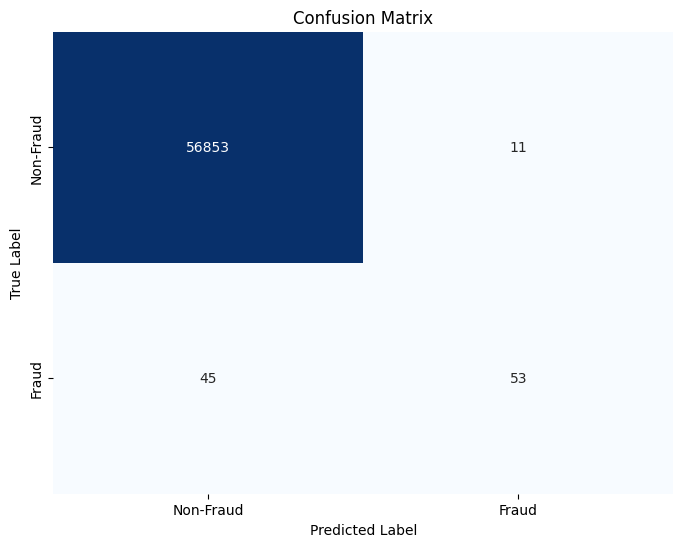

In [41]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix ni 
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()